# Estratégia **Intraday** | A verdadeira forma de ganhar dinheiro com ações dormindo

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

### 1. Algoritmo para criação das colunas

In [2]:
ticker = 'BBDC4.SA'
period = '3y'
interval = '1d'

closed = yf.Ticker(ticker).history(interval=interval, period=period)[['Open','Close']]
closed.head()

,Open,Close
Date,,
2019-02-25,29.400334,29.038584
2019-02-26,29.045157,29.558182
2019-02-27,29.485846,29.229332
2019-02-28,29.295102,28.459791
2019-03-01,28.637375,27.986227


In [3]:
df = pd.DataFrame(closed)
investiment = 10

df['OpenShifted'] = df['Open'].shift(-1)
df['IntradayProfit'] = (df['OpenShifted'] - df['Close']).shift(1) * investiment
df['DayProfit'] = (df['Close'] - df['Open']) * investiment

### 2. Resultado único

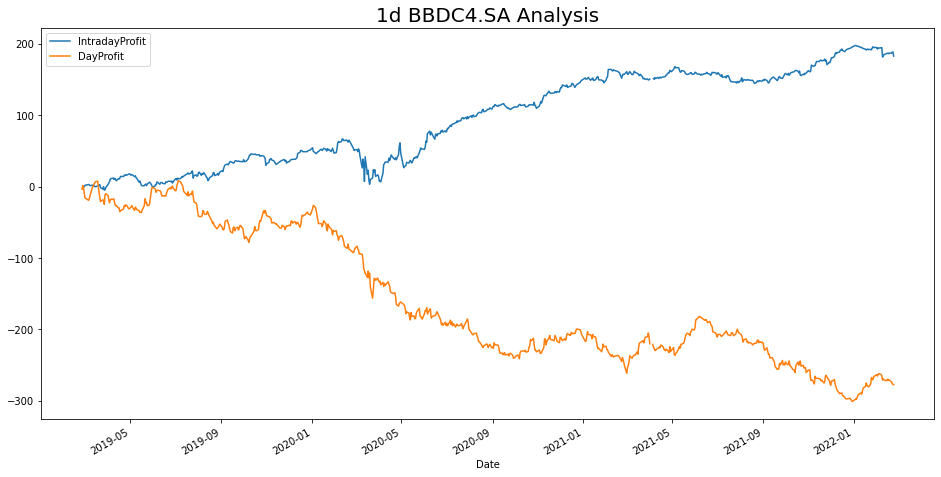

In [4]:
fig = df[['IntradayProfit','DayProfit']].cumsum().plot(figsize=(16,8), title = f'{interval} {ticker} Analysis')
fig.title.set_size(20)

#### Foto para vídeo:

Volatilidade Dia: 1.96%
Volatilidade Noite: 1.69%


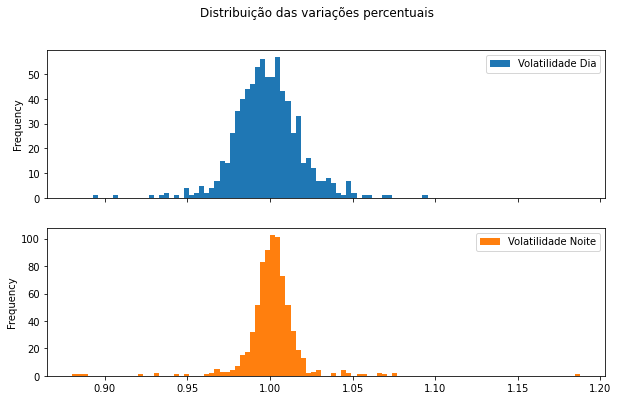

In [38]:
#Aqui ao invés de calcular o lucro estou calculando a variação percentual: quero mostrar a volatilidade.

#Ps.: Queimei o último valor da Volatilidade Dia para ficar igual ao Volatilidade Noite mas não seria necessário.

graph_var = pd.DataFrame({'Volatilidade Dia': (df['Close']/df['Open']).shift(),
                          'Volatilidade Noite': (df['OpenShifted']/df['Close']).shift()})

vol_day = round(((df['Close']/df['Open']).shift().std())*100,2)
vol_night = round(((df['OpenShifted']/df['Close']).shift().std())*100,2)

print(f'Volatilidade Dia: {vol_day}%')
print(f'Volatilidade Noite: {vol_night}%')
graph_var.plot(kind='hist',
               subplots=True,
               bins= 100,
               title='Distribuição das variações percentuais',
               figsize = (10,6))
plt.show()

### 3. Forma de armazenamento dos dados

### 4. Baixando mais amostras

### 5. Ampliação e comprovação dos resultados

##### 5.1 Probabilidade e estatística